In [147]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [148]:
from os import walk
for (dirpath, dirnames, filenames) in walk("Celebrity Faces Dataset"):
    print("Directory path: ", dirpath)

Directory path:  Celebrity Faces Dataset
Directory path:  Celebrity Faces Dataset/Hugh Jackman
Directory path:  Celebrity Faces Dataset/Angelina Jolie
Directory path:  Celebrity Faces Dataset/Natalie Portman
Directory path:  Celebrity Faces Dataset/Kate Winslet
Directory path:  Celebrity Faces Dataset/Megan Fox
Directory path:  Celebrity Faces Dataset/Denzel Washington
Directory path:  Celebrity Faces Dataset/Brad Pitt
Directory path:  Celebrity Faces Dataset/Johnny Depp
Directory path:  Celebrity Faces Dataset/Leonardo DiCaprio
Directory path:  Celebrity Faces Dataset/Jennifer Lawrence
Directory path:  Celebrity Faces Dataset/Tom Hanks
Directory path:  Celebrity Faces Dataset/Sandra Bullock
Directory path:  Celebrity Faces Dataset/Nicole Kidman
Directory path:  Celebrity Faces Dataset/Robert Downey Jr
Directory path:  Celebrity Faces Dataset/Will Smith
Directory path:  Celebrity Faces Dataset/Scarlett Johansson
Directory path:  Celebrity Faces Dataset/Tom Cruise


In [149]:
data_path="Celebrity Faces Dataset"

In [150]:
import cv2
import numpy as np
import os
def preprocess_images(dataset_path):
    images_data = []
    images_label = []
    class_names = os.listdir(dataset_path)
    for class_name in class_names:
        images_path = dataset_path + '/' + class_name
        images = os.listdir(images_path)
        for image in images:
            bgr_img = cv2.imread(images_path + '/' + image)
            # dsize
            dsize = (120,120)
            #resize image
            resized_image = cv2.resize(bgr_img,dsize)
            # convert from BGR color-space to YCrCb
            ycrcb_img = cv2.cvtColor(resized_image, cv2.COLOR_BGR2YCrCb)
            # equalize the histogram of the Y channel
            ycrcb_img[:, :, 0] = cv2.equalizeHist(ycrcb_img[:, :, 0])
            # convert back to BGR color-space from YCrCb
            equalized_img = cv2.cvtColor(ycrcb_img, cv2.COLOR_YCrCb2BGR)
            images_data.append(equalized_img/255)
            images_label.append(class_name)
    images_data = np.array(images_data)
    images_label = np.array(images_label)
    return images_data, images_label

In [151]:
train_images_data, train_images_label = preprocess_images(data_path)

Hugh Jackman


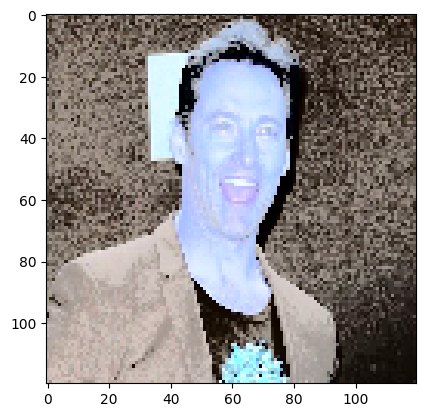

In [152]:
import matplotlib.pyplot as plt
print(train_images_label[0])
plt.imshow(train_images_data[0])

In [153]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
class_names = os.listdir(data_path)
class_num = len(class_names)
train_images_label = le.fit_transform(train_images_label)

In [154]:
train_images_label

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 2,

In [155]:
print(train_images_data.shape)
print(train_images_label.shape)

(748, 120, 120, 3)
(748,)


In [158]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the pre-trained VGG16 model
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(120,120, 3))

# Freeze the convolutional base
vgg16.trainable = False

# Create a new model by adding a custom classifier on top of VGG16
model = Sequential()
model.add(vgg16)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(17, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



In [159]:
# Train the model
model.fit(x=train_images_data,y=train_images_label,
          epochs=10,
)


Epoch 1/10
24/24 [==============================] - 2s 42ms/step - loss: 1.9035 - accuracy: 0.2968
Epoch 2/10
24/24 [==============================] - 1s 40ms/step - loss: 0.9044 - accuracy: 0.6952
Epoch 3/10
24/24 [==============================] - 1s 40ms/step - loss: 0.6029 - accuracy: 0.8289
Epoch 4/10
24/24 [==============================] - 1s 40ms/step - loss: 0.3700 - accuracy: 0.9372
Epoch 5/10
24/24 [==============================] - 1s 40ms/step - loss: 0.2703 - accuracy: 0.9505
Epoch 6/10
24/24 [==============================] - 1s 41ms/step - loss: 0.1924 - accuracy: 0.9866
Epoch 7/10
24/24 [==============================] - 1s 41ms/step - loss: 0.1249 - accuracy: 0.9960
Epoch 8/10
24/24 [==============================] - 1s 42ms/step - loss: 0.0905 - accuracy: 1.0000
Epoch 9/10
24/24 [==============================] - 1s 40ms/step - loss: 0.0662 - accuracy: 0.9987
Epoch 10/10
24/24 [==============================] - 1s 40ms/step - loss: 0.0519 - accuracy: 0.9987


In [160]:
test_path="/content/drive/MyDrive/angelina.jpg"

In [161]:
bgr_img = cv2.imread(test_path)
            # dsize
dsize = (120,120)
            #resize image
resized_image = cv2.resize(bgr_img,dsize)

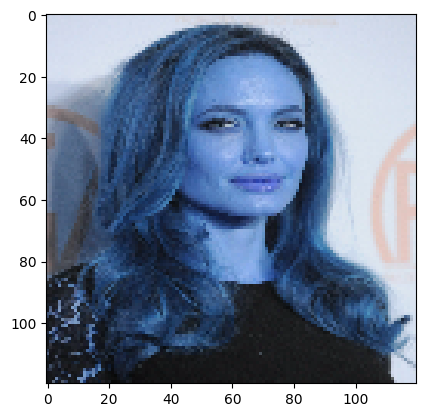

In [162]:
plt.imshow(resized_image)

In [163]:
# output=model.predict(equalized_img)

In [164]:
import numpy as np
# Preprocess the image
preprocessed_img = resized_image # Resize the image to match VGG16 input size
preprocessed_img = np.expand_dims(preprocessed_img, axis=0)  # Add an extra dimension to represent batch size
# Make predictions
predictions = model.predict(preprocessed_img)
predicted_class = np.argmax(predictions)
# Get the predicted celebrity label and corresponding probability
predicted_celebrity = predicted_class
# Print the predicted celebrity and probability
print("Predicted Celebrity:", predicted_celebrity)

Exception ignored in: <function _xla_gc_callback at 0x7f315c65dfc0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 103, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


1/1 [==============================] - 0s 145ms/step
Predicted Celebrity: 0


In [165]:
predictions

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.]], dtype=float32)

In [166]:
le.inverse_transform([np.argmax(predictions)])

array(['Angelina Jolie'], dtype='<U17')